In [1]:
from google.colab import files
uploaded = files.upload()

Saving breast_dataset.zip to breast_dataset.zip


In [2]:
import zipfile
import os

zip_path = '/content/breast_dataset.zip'  # Replace with your uploaded file path
extract_dir = '/content/skin_images_224/'

os.makedirs(extract_dir, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted to: {extract_dir}")

Extracted to: /content/skin_images_224/


In [3]:
# slice 1 : we have the images
# Slice 1: Balance + Encode Labels + Split

import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Recreate df_final from folder structure
def create_df_from_folders(base_dir):
    data = []
    for split in ['train', 'val', 'test']:
        for label in ['Benign', 'Malignant']:
            folder = f'{base_dir}/{split}/{label}'  # Direct path
            if not os.path.exists(folder):
                print(f"Warning: Folder not found: {folder}")
                continue
            for img_name in os.listdir(folder):
                img_path = f'{folder}/{img_name}'  # Direct path
                if not os.path.exists(img_path):
                    print(f"Warning: File not found: {img_path}")
                    continue
                patient_id = img_name.split('_')[0]
                data.append({
                    'image_path': img_path,
                    'label': label,
                    'PatientID': patient_id
                })
    df = pd.DataFrame(data)
    if df.empty:
        raise ValueError("No valid files found")
    df['label_encoded'] = df['label'].map({'Benign': 0, 'Malignant': 1})
    return df

# Clear old CSVs
!rm -f *.csv

# Load images from folder
base_dir = '/content/skin_images_224'
df_final = create_df_from_folders(base_dir)

# Verify balance
print(df_final['label'].value_counts())

# Split: 70% train, 15% val, 15% test
df_temp, df_test = train_test_split(df_final, test_size=0.15, stratify=df_final["label_encoded"], random_state=42)
df_train, df_val = train_test_split(df_temp, test_size=0.176, stratify=df_temp["label_encoded"], random_state=42)

# Verify
print(f"Train: {len(df_train)}, Val: {len(df_val)}, Test: {len(df_test)}")

# Save splits
df_train.to_csv('train_split.csv', index=False)
df_val.to_csv('val_split.csv', index=False)
df_test.to_csv('test_split.csv', index=False)

label
Benign       12012
Malignant    12012
Name: count, dtype: int64
Train: 16826, Val: 3594, Test: 3604


In [4]:
# slice2 :
import pandas as pd
import os

def validate_csv_paths(df):
    # Log missing paths, keep all rows
    missing = []
    for _, row in df.iterrows():
        img_path = os.path.normpath(row['image_path'])
        if not os.path.exists(img_path):
            missing.append(img_path)
    if missing:
        print(f"Missing files (first 10): {missing[:10]}")
        print(f"Total missing: {len(missing)}")
    return df

# Load and validate CSVs
for split in ['train', 'val', 'test']:
    df = pd.read_csv(f'{split}_split.csv')
    df = validate_csv_paths(df)
    df.to_csv(f'{split}_split_processed.csv', index=False)

# Verify disk
print(f"Disk usage: {os.popen('df -h .').read()}")

Disk usage: Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   38G   76G  34% /



Found 16826 files belonging to 2 classes.
Found 3594 files belonging to 2 classes.
Found 3604 files belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.6086 - loss: 0.7744 - precision: 0.6089 - recall: 0.5886

262/262 ━━━━━━━━━━━━━━━━━━━━ 97s 294ms/step - accuracy: 0.6087 - loss: 0.7741 - precision: 0.6090 - recall: 0.5888 - val_accuracy: 0.7508 - val_loss: 0.5197 - val_precision: 0.7962 - val_recall: 0.6739 - learning_rate: 0.0010
Epoch 2/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.6949 - loss: 0.6023 - precision: 0.6993 - recall: 0.6766

262/262 ━━━━━━━━━━━━━━━━━━━━ 78s 268ms/step - accuracy: 0.6949 - loss: 0.6023 - precision: 0.6994 - recall: 0.6766 - val_accuracy: 0.7598 - val_loss: 0.4846 - val_precision: 0.8257 - val_recall: 0.6596 - learning_rate: 0.0010
Epoch 3/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.7091 - loss: 0.5695 - precision: 0.7136 - recall: 0.6899

262/262 ━━━━━━━━━━━━━━━━━━━━ 72s 277ms/step - accuracy: 0.7092 - loss: 0.5695 - precision: 0.7137 - recall: 0.6899 - val_accuracy: 0.7818 - val_loss: 0.4578 - val_precision: 0.8234 - val_recall: 0.7166 - learning_rate: 0.0010
Epoch 4/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.7172 - loss: 0.5582 - precision: 0.7255 - recall: 0.6971

262/262 ━━━━━━━━━━━━━━━━━━━━ 80s 305ms/step - accuracy: 0.7172 - loss: 0.5582 - precision: 0.7255 - recall: 0.6971 - val_accuracy: 0.7958 - val_loss: 0.4541 - val_precision: 0.7953 - val_recall: 0.7962 - learning_rate: 0.0010
Epoch 5/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 69s 265ms/step - accuracy: 0.7248 - loss: 0.5472 - precision: 0.7326 - recall: 0.7042 - val_accuracy: 0.7810 - val_loss: 0.4644 - val_precision: 0.8539 - val_recall: 0.6782 - learning_rate: 0.0010
Epoch 6/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.7176 - loss: 0.5520 - precision: 0.7195 - recall: 0.6995

262/262 ━━━━━━━━━━━━━━━━━━━━ 82s 314ms/step - accuracy: 0.7176 - loss: 0.5520 - precision: 0.7195 - recall: 0.6995 - val_accuracy: 0.7907 - val_loss: 0.4534 - val_precision: 0.8135 - val_recall: 0.7545 - learning_rate: 0.0010
Epoch 7/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 70s 266ms/step - accuracy: 0.7215 - loss: 0.5485 - precision: 0.7267 - recall: 0.7034 - val_accuracy: 0.7754 - val_loss: 0.4681 - val_precision: 0.8515 - val_recall: 0.6665 - learning_rate: 0.0010
Epoch 8/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 69s 266ms/step - accuracy: 0.7280 - loss: 0.5409 - precision: 0.7355 - recall: 0.7090 - val_accuracy: 0.7843 - val_loss: 0.4615 - val_precision: 0.8198 - val_recall: 0.7298 - learning_rate: 0.0010
Epoch 1/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.7139 - loss: 0.5688 - precision: 0.7081 - recall: 0.7203

262/262 ━━━━━━━━━━━━━━━━━━━━ 113s 297ms/step - accuracy: 0.7140 - loss: 0.5686 - precision: 0.7082 - recall: 0.7204 - val_accuracy: 0.8491 - val_loss: 0.3625 - val_precision: 0.8830 - val_recall: 0.8046 - learning_rate: 1.0000e-05
Epoch 2/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.8211 - loss: 0.3882 - precision: 0.8314 - recall: 0.8014

262/262 ━━━━━━━━━━━━━━━━━━━━ 139s 472ms/step - accuracy: 0.8212 - loss: 0.3881 - precision: 0.8315 - recall: 0.8015 - val_accuracy: 0.8864 - val_loss: 0.2731 - val_precision: 0.9256 - val_recall: 0.8404 - learning_rate: 1.0000e-05
Epoch 3/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.8766 - loss: 0.2861 - precision: 0.8874 - recall: 0.8603

262/262 ━━━━━━━━━━━━━━━━━━━━ 82s 316ms/step - accuracy: 0.8767 - loss: 0.2860 - precision: 0.8874 - recall: 0.8604 - val_accuracy: 0.9088 - val_loss: 0.2187 - val_precision: 0.9513 - val_recall: 0.8615 - learning_rate: 1.0000e-05
Epoch 4/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.9208 - loss: 0.2013 - precision: 0.9283 - recall: 0.9103

262/262 ━━━━━━━━━━━━━━━━━━━━ 77s 296ms/step - accuracy: 0.9208 - loss: 0.2013 - precision: 0.9283 - recall: 0.9103 - val_accuracy: 0.9305 - val_loss: 0.1627 - val_precision: 0.9243 - val_recall: 0.9382 - learning_rate: 1.0000e-05
Epoch 5/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.9363 - loss: 0.1607 - precision: 0.9447 - recall: 0.9275

262/262 ━━━━━━━━━━━━━━━━━━━━ 76s 291ms/step - accuracy: 0.9364 - loss: 0.1607 - precision: 0.9447 - recall: 0.9276 - val_accuracy: 0.9509 - val_loss: 0.1225 - val_precision: 0.9596 - val_recall: 0.9414 - learning_rate: 1.0000e-05
Epoch 6/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.9535 - loss: 0.1219 - precision: 0.9583 - recall: 0.9477

262/262 ━━━━━━━━━━━━━━━━━━━━ 82s 313ms/step - accuracy: 0.9535 - loss: 0.1219 - precision: 0.9583 - recall: 0.9477 - val_accuracy: 0.9595 - val_loss: 0.1020 - val_precision: 0.9523 - val_recall: 0.9677 - learning_rate: 1.0000e-05
Epoch 7/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.9619 - loss: 0.0988 - precision: 0.9675 - recall: 0.9553

262/262 ━━━━━━━━━━━━━━━━━━━━ 82s 313ms/step - accuracy: 0.9619 - loss: 0.0988 - precision: 0.9675 - recall: 0.9553 - val_accuracy: 0.9662 - val_loss: 0.0864 - val_precision: 0.9821 - val_recall: 0.9498 - learning_rate: 1.0000e-05
Epoch 8/8
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9728 - loss: 0.0780 - precision: 0.9760 - recall: 0.9689

262/262 ━━━━━━━━━━━━━━━━━━━━ 76s 290ms/step - accuracy: 0.9728 - loss: 0.0780 - precision: 0.9760 - recall: 0.9689 - val_accuracy: 0.9674 - val_loss: 0.0832 - val_precision: 0.9838 - val_recall: 0.9503 - learning_rate: 1.0000e-05
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.9648 - loss: 0.0853 - precision: 0.9755 - recall: 0.9510



Test Loss: 0.0779
Test Accuracy: 0.9696
Test Precision: 0.9822
Test Recall: 0.9564
Test F1 Score: 0.9691

Stage 1 Best Epoch: 6
 - Train Loss      : 0.5512
 - Train Accuracy  : 0.7183
 - Train Precision : 0.7256
 - Train Recall    : 0.7010
 - Val Loss        : 0.4534
 - Val Accuracy    : 0.7907
 - Val Precision   : 0.8135
 - Val Recall      : 0.7545

Stage 2 Best Epoch: 8
 - Train Loss      : 0.0755
 - Train Accuracy  : 0.9730
 - Train Precision : 0.9772
 - Train Recall    : 0.9685
 - Val Loss        : 0.0832
 - Val Accuracy    : 0.9674
 - Val Precision   : 0.9838
 - Val Recall      : 0.9503
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
2/2 ━━━━━━━━━━━━━━━━

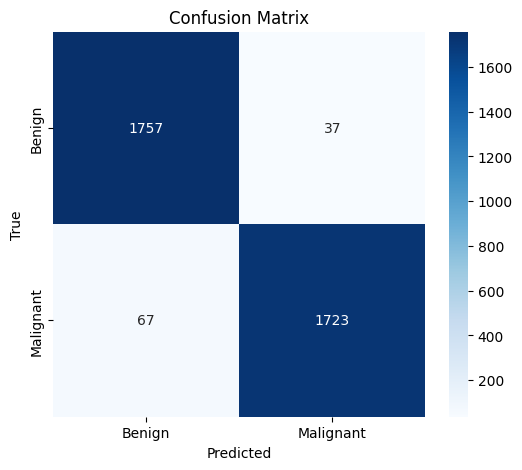

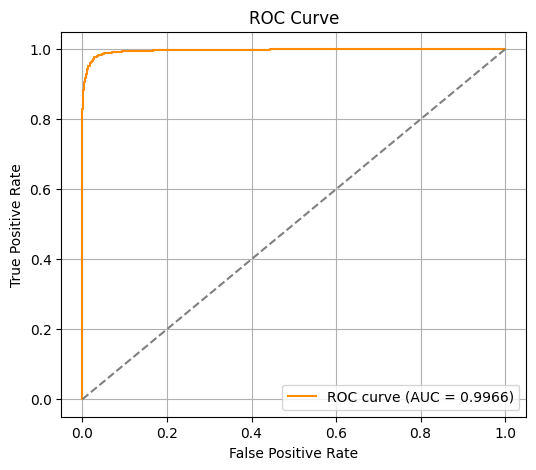

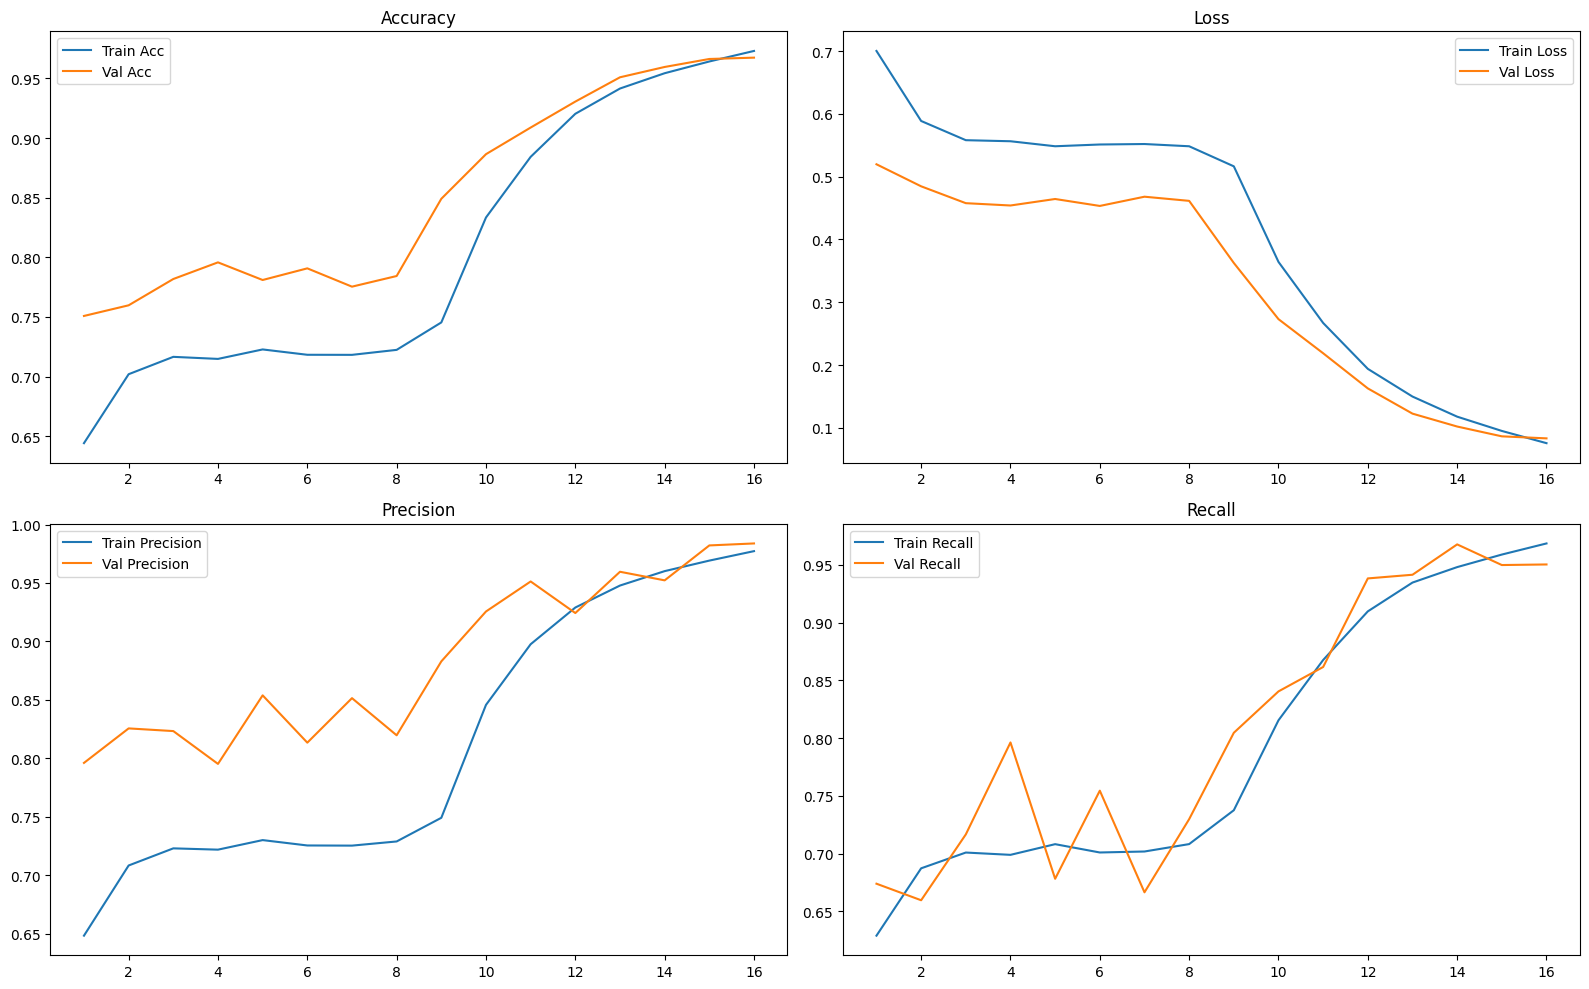

In [5]:
# slice3 : resnet50 :
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers, mixed_precision
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import numpy as np

mixed_precision.set_global_policy('mixed_float16')

BATCH_SIZE = 64
IMG_SIZE = (224, 224)
EPOCHS_STAGE1 = 8
EPOCHS_STAGE2 = 8
output_dir = "/content/skin_images_224"
os.makedirs(output_dir, exist_ok=True)

def augment_image(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    image = tf.image.random_saturation(image, 0.8, 1.2)
    image = tf.image.random_hue(image, 0.1)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4,
                                                      dtype=tf.int32))
    return image, label

def preprocess_image(image, label):
    image = resnet_preprocess(image)
    return image, label

def create_dataset(dir_path, augment=False):
    ds = tf.keras.utils.image_dataset_from_directory(
        dir_path,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        label_mode='binary',
        shuffle=True
    )
    ds = ds.map(lambda x, y: (tf.cast(x, tf.float32), y), num_parallel_calls=tf.data.AUTOTUNE)
    if augment:
        ds = ds.unbatch().map(augment_image, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE)
    ds = ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    return ds.repeat().prefetch(buffer_size=tf.data.AUTOTUNE)

train_ds = create_dataset(f"{output_dir}/train", augment=True)
val_ds = create_dataset(f"{output_dir}/val", augment=False)
test_ds = create_dataset(f"{output_dir}/test", augment=False)

df_train = pd.read_csv('train_split_processed.csv')
df_val = pd.read_csv('val_split_processed.csv')
df_test = pd.read_csv('test_split_processed.csv')

train_steps = len(df_train) // BATCH_SIZE
val_steps = len(df_val) // BATCH_SIZE
test_steps = len(df_test) // BATCH_SIZE

# Load ResNet50
base_model = ResNet50(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid',
                 kernel_regularizer=regularizers.l2(1e-4),
                 dtype='float32')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)

earlystop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7, verbose=1)
checkpoint1 = callbacks.ModelCheckpoint("best_model_stage1_resnet50.h5", save_best_only=True)

# Stage 1 training
history1 = model.fit(
    train_ds,
    epochs=EPOCHS_STAGE1,
    steps_per_epoch=train_steps,
    validation_data=val_ds,
    validation_steps=val_steps,
    callbacks=[earlystop, reduce_lr, checkpoint1]
)

# Stage 2 - fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-40]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)

earlystop2 = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr2 = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7, verbose=1)
checkpoint2 = callbacks.ModelCheckpoint("best_model_stage2_resnet50.h5", save_best_only=True)

history2 = model.fit(
    train_ds,
    epochs=EPOCHS_STAGE2,
    steps_per_epoch=train_steps,
    validation_data=val_ds,
    validation_steps=val_steps,
    callbacks=[earlystop2, reduce_lr2, checkpoint2]
)

# Evaluation on test set
test_metrics = model.evaluate(test_ds, steps=test_steps)
test_loss, test_acc, test_prec, test_rec = test_metrics
test_f1 = 2 * (test_prec * test_rec) / (test_prec + test_rec + 1e-7)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall: {test_rec:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


# Create a list to hold both histories
history_all = [history1, history2]

# Updated best metrics function (Grok version)
def print_best_metrics(history, stage_name):
    best_epoch = np.argmin(history.history['val_loss'])
    # Find precision and recall metrics dynamically
    precision_key = next((k for k in history.history if 'precision' in k and 'val' not in k), None)
    recall_key = next((k for k in history.history if 'recall' in k and 'val' not in k), None)
    val_precision_key = next((k for k in history.history if 'val_precision' in k), None)
    val_recall_key = next((k for k in history.history if 'val_recall' in k), None)

    if not all([precision_key, recall_key, val_precision_key, val_recall_key]):
        raise KeyError("Could not find precision or recall metrics in history")

    print(f"\n{stage_name} Best Epoch: {best_epoch + 1}")
    print(f" - Train Loss      : {history.history['loss'][best_epoch]:.4f}")
    print(f" - Train Accuracy  : {history.history['accuracy'][best_epoch]:.4f}")
    print(f" - Train Precision : {history.history[precision_key][best_epoch]:.4f}")
    print(f" - Train Recall    : {history.history[recall_key][best_epoch]:.4f}")
    print(f" - Val Loss        : {history.history['val_loss'][best_epoch]:.4f}")
    print(f" - Val Accuracy    : {history.history['val_accuracy'][best_epoch]:.4f}")
    print(f" - Val Precision   : {history.history[val_precision_key][best_epoch]:.4f}")
    print(f" - Val Recall      : {history.history[val_recall_key][best_epoch]:.4f}")

print_best_metrics(history_all[0], "Stage 1")
print_best_metrics(history_all[1], "Stage 2")

# Save final model
model.save("final_model_resnet50.h5")

# Predictions for Confusion Matrix and ROC
y_true = []
y_pred_probs = []
for batch in test_ds.take(test_steps):
    images, labels = batch
    y_true.extend(labels.numpy())
    preds = model.predict(images)
    y_pred_probs.extend(preds.flatten())

# 0.5 to 0.4 test
y_pred = [1 if p > 0.4 else 0 for p in y_pred_probs]
# 0.5 to 0.3 test
# y_pred = [1 if p > 0.3 else 0 for p in y_pred_probs]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve'); plt.legend()
plt.grid(True)
plt.savefig("roc_curve.png")
plt.show()

# Plotting training metrics
def plot_history(histories):
    acc, val_acc, loss, val_loss = [], [], [], []
    prec, val_prec, rec, val_rec = [], [], [], []

    for hist in histories:
        acc.extend(hist.history.get('accuracy', []))
        val_acc.extend(hist.history.get('val_accuracy', []))
        loss.extend(hist.history.get('loss', []))
        val_loss.extend(hist.history.get('val_loss', []))
        for metric in hist.history:
            if 'precision' in metric and 'val' not in metric:
                prec.extend(hist.history[metric])
            if 'val_precision' in metric:
                val_prec.extend(hist.history[metric])
            if 'recall' in metric and 'val' not in metric:
                rec.extend(hist.history[metric])
            if 'val_recall' in metric:
                val_rec.extend(hist.history[metric])

    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(16, 10))
    plt.subplot(2, 2, 1)
    plt.plot(epochs, acc, label='Train Acc')
    plt.plot(epochs, val_acc, label='Val Acc')
    plt.legend(); plt.title('Accuracy')
    plt.subplot(2, 2, 2)
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.legend(); plt.title('Loss')
    plt.subplot(2, 2, 3)
    plt.plot(epochs, prec, label='Train Precision')
    plt.plot(epochs, val_prec, label='Val Precision')
    plt.legend(); plt.title('Precision')
    plt.subplot(2, 2, 4)
    plt.plot(epochs, rec, label='Train Recall')
    plt.plot(epochs, val_rec, label='Val Recall')
    plt.legend(); plt.title('Recall')
    plt.tight_layout()
    plt.savefig("training_metrics_version1_8.png")
    plt.show()

plot_history(history_all)

In [7]:
from google.colab import files

# List of all files you want to download
file_list = [
    "best_model_stage2_resnet50.h5",
    "best_model_stage1_resnet50.h5",
    "final_model_resnet50.h5",
    "training_metrics_version1_8.png"
]

# Loop through and download each
for file in file_list:
    if os.path.exists(file):
        files.download(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


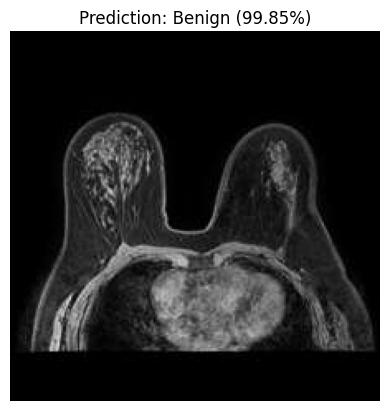

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
import os

# === Dummy Cast layer (for deserialization only) ===
class Cast(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.cast(inputs, tf.float32)

# === Load ResNet50 Model with Custom Object ===
model_path = "/content/final_model_resnet50.h5"
model = load_model(model_path, custom_objects={"Cast": Cast}, compile=False)

# === Path to image ===
image_path = "/content/skin_images_224/test/Benign/BREASTDX-01-0001_1074.jpg"

# === Preprocess the image for ResNet50 ===
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # ResNet50 preprocessing

# === Predict ===
prediction = model.predict(img_array)[0][0]  # Assuming sigmoid output
label = "Malignant" if prediction > 0.4 else "Benign"
confidence = prediction if prediction > 0.4 else 1 - prediction

# === Show Image + Prediction Result ===
plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction: {label} ({confidence:.2%})")
plt.show()
